## Environment Mapping 

우리가 개발한 레이트레이서의 가장 좋은 특징 중 하나는 반사되는 물체를 보여주는 기능이다.   
레스터라이저의 반사는 설득력이 있지만, 가짜인 경우도 존재한다.   

우리가 집 안의 장면을 상상하고, 방 중간에 놓인 반사되는 물체를 렌더링 한다고 생각하자.   
물체의 표면을 나타내는 각 픽셀에 대해, 우리는 점이 나타내는 3차원 좌표를 알고 있다. 점의 표면 법선벡터와 카메라의 위치를 알고 있기 때문에, 우리는 점까지의 `view vector` 을 계산할 수 있다.   

이 부분에서 우리는 `reflection vector`의 방향에서 오는 빛의 색을 알기 원한다.   
만약 `raytracer` 라면 `ray` 의 방향을 추적하면 되지만, `raytracer` 가 아니면 어떻게 해야할까?    

**Environment mapping** 은 위의 질문의 해답이 된다.   

큐브의 가운데에 카메라를 위치하고, 6면(위, 아래, 오른쪽, 왼쪽, 앞, 뒤)을 렌더링한다.   
큐브의 6면이 뷰포트라고 가정한다.   그럼 우리는 6개의 텍스처를 얻을 수 있다.    
우리는 이런 기술을 `cube mapping` 이라고 한다.    

반사되는 색을 필요로할 때가 있을 때, 우리는 큐브 맵 상에서의 텍스처를 고르고 텍스처 상에서의 텍셀을 골라서 그 방향에서 보여지는 색의 근사치를 얻을 수 있다.   
이 기술은 부작용이 있다.  큐브맵은 한 포인트로부터의 장면의 모습을 캡처한다.  
만약 우리가 렌더링하려는 반사되는 물체가 그 지점에 위치하지 않는다면, 실제와 차이가 생긴다.   

반사된 물체가 방 안에서 움직인다면, 더 이상하게 보인다.   

다른 부작용은 우리는 오브젝트를 static(반사가 일어나지 않는 물체)과 dynamic(반사가 일어나는 물체)으로 나누어야 한다.    
static에는 책상, 의자와 같이 반사가 일어나지 않는 물체를 포함하고, dynamic은 거울과 같이 반사가 일어나는 물체이다.    
dynamic 물체는 다른 dynamic 물체를 반사하지 못하다는 단점이 있다.    


마지막 부작용은 cube map의 해상도와 연관되어 있다.   
레이트레이서는 빠르게 반사할 수 있지만, 우리는 정확성과 메모리 소비 사이에서의 트레이드 오프(trade-off)가 필요하다.    


### Shadows

raytracer은 정확한 그림자 구현이 가능했다.   하지만 rasterizer의 아키텍처는 그림자를 적용하는데 어려움이 있지만 불가능하지는 않다.    

우리는 그림자를 정확하게 렌더링 하기 위해, 매 순간 각 픽셀과 빛의 방정식을 계산해야 한다.   
우리는 픽셀이 실제로 빛에 의해 빛나는지 아님 그림자에 있는지를 알아야 한다.    

#### Stencil Shadows

`stencil shadows` 는 뚜렷하게 정의된 모서리를 그리는 기법이다.    이는 `hard shadows` 라고도 불린다.   
우리의 rasterizer은 한번에 장면을 렌더링한다.    
우리는 각 빛마다 렌러링 과정을 거친다.   
Ambient light, First light, Second light 마다 렌더링 과정을 거치고 이를 픽셀별로 합쳐 최종 결과물을 얻는다.   

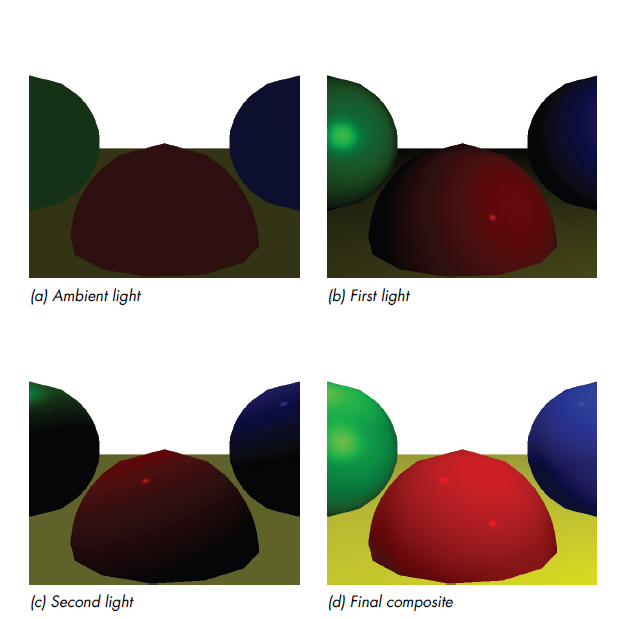

우리의 목표는 "여러개의 빛에 의해 생성되는 그림자가 있는 장면" 을 렌더링하는 것에서     
"하나의 빛에 의해 생성되는 장면을 여러번" 렌더링 하는 것으로 간단하게 나타낸다.    

이것을 위해 우리는 `stencil buffer` 을 소개한다.  
depth buffer 와 같이 우리는 캔버스와 같은 차원을 가지지만, 이는 integer 요소를 가진다.   

`stencil buffer` 안에 대응하는 요소가 0값을 가질때 픽셀을 그리는 코드로 수정하는 것과 같이, stencil buffer을 사용할 수 있다.    
